<a href="https://colab.research.google.com/github/komal029/DepressionPrediction/blob/main/depression_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/DepressionDetection/Depression_Text.xlsx"

In [ ]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string


# NLTK
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# ML


# other stuff
from collections import Counter

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
df = pd.read_excel(file_path)
df

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age
...,...,...,...,...,...
7484,"""Nothing beats the feeling of achieving someth...",0.0,16.0,Female,Teen Age
7485,Too much homework Feeling Stressed!,1.0,16.0,Female,Teen Age
7486,"overworked in school,, causes me headache",1.0,16.0,Female,Teen Age
7487,How come my friends immediately get to know st...,0.0,16.0,Female,Young Age


In [ ]:
df.columns

Index(['text', 'label', 'Age', 'Gender', 'Age Category'], dtype='object')

In [ ]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color":"#F3FFFF","color":"BLACK","border": "1.5px  solid black"})

Shape of The Student  Dataset : (7489, 5)

Glimpse of The Dataset :


,text,label,Age,Gender,Age Category
0,let Gather For Party,0.000000,16.000000,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.000000,17.000000,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Depressed,1.000000,16.000000,Male,Teen Age
3,Nice picture,0.000000,16.000000,Male,Teen Age
4,"Feeling worried, even though you actually have a God who is ready to help you in any case.",1.000000,16.000000,Male,Teen Age


In [ ]:
df.tail().style.set_properties(**{"background-color": "#F3FFFF","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Category
7484,"""Nothing beats the feeling of achieving something you've been working hard towards. Feeling proud and happy!""",0.000000,16.000000,Female,Teen Age
7485,Too much homework Feeling Stressed!,1.000000,16.000000,Female,Teen Age
7486,"overworked in school,, causes me headache",1.000000,16.000000,Female,Teen Age
7487,How come my friends immediately get to know strangers,0.000000,16.000000,Female,Young Age
7488,toady I wake at 5am,0.000000,16.000000,Female,Young Age


In [ ]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7476 non-null   object 
 1   label         7486 non-null   float64
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
dtypes: float64(2), object(3)
memory usage: 292.7+ KB
None


In [ ]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,7486.000000,0.163906,0.370215,0.000000,0.000000,0.000000,0.000000,1.000000
Age,7486.000000,15.379108,1.058104,13.000000,14.000000,15.000000,16.000000,17.000000


In [ ]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,7476,7370,ni-ki best boy,11
Gender,7486,2,Male,4062
Age Category,7486,2,Young Age,3974


In [ ]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

Null Values of Dataset :


,text,label,Age,Gender,Age Category
0,13,3,3,3,3


In [ ]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

After Dropping, Null Values of  Dataset :


,text,label,Age,Gender,Age Category
0,0,0,0,0,0


In [ ]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 34 duplicate entries among 7476 entries in  dataset.


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df['label'].value_counts().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

,0.000000,1.000000
label,6252,1224


<ipython-input-22-999eb7442d83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#0080ff')


Text(0, 0.5, 'Freq')

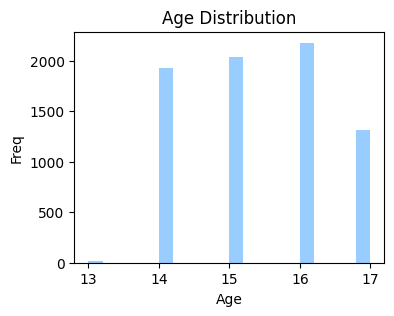

In [ ]:
fig,ax = plt.subplots(figsize=(4,3))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#0080ff')
plt.title('Age Distribution')
plt.ylabel('Freq')


Glimpse of The Age of Students :


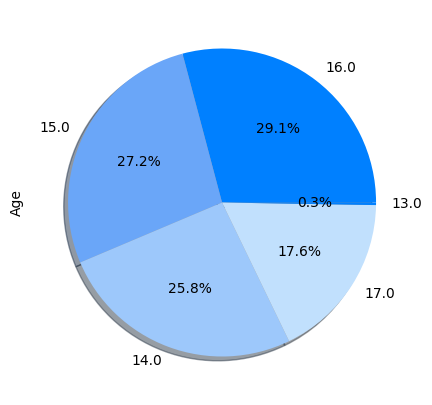

In [ ]:
print(f"\nGlimpse of The Age of Students :")
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5), colors=['#0080ff','#6aa6f8','#9dc8fb','#c1e0fd'])
plt.show()



Glimpse of Relation Between Label and Age Group of Students :


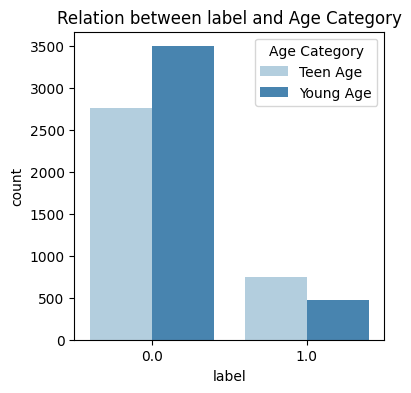

In [ ]:
print(f"\nGlimpse of Relation Between Label and Age Group of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='label', hue='Age Category', data=df, palette='Blues')
plt.title('Relation between label and Age Category')
plt.show()



Glimpse of Relation Between Gender and Age  of Students :


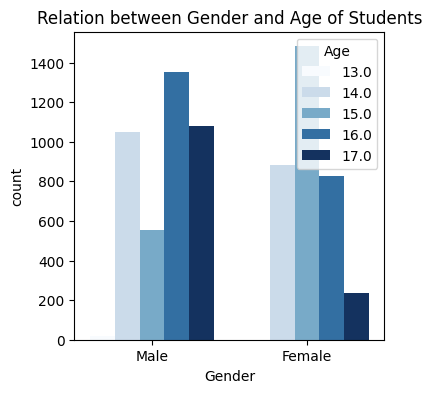

In [ ]:
print(f"\nGlimpse of Relation Between Gender and Age  of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='Age', data=df, palette='Blues')
plt.title('Relation between Gender and Age of Students')
plt.show()


<ipython-input-26-6989ba05ccf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette='Blues')


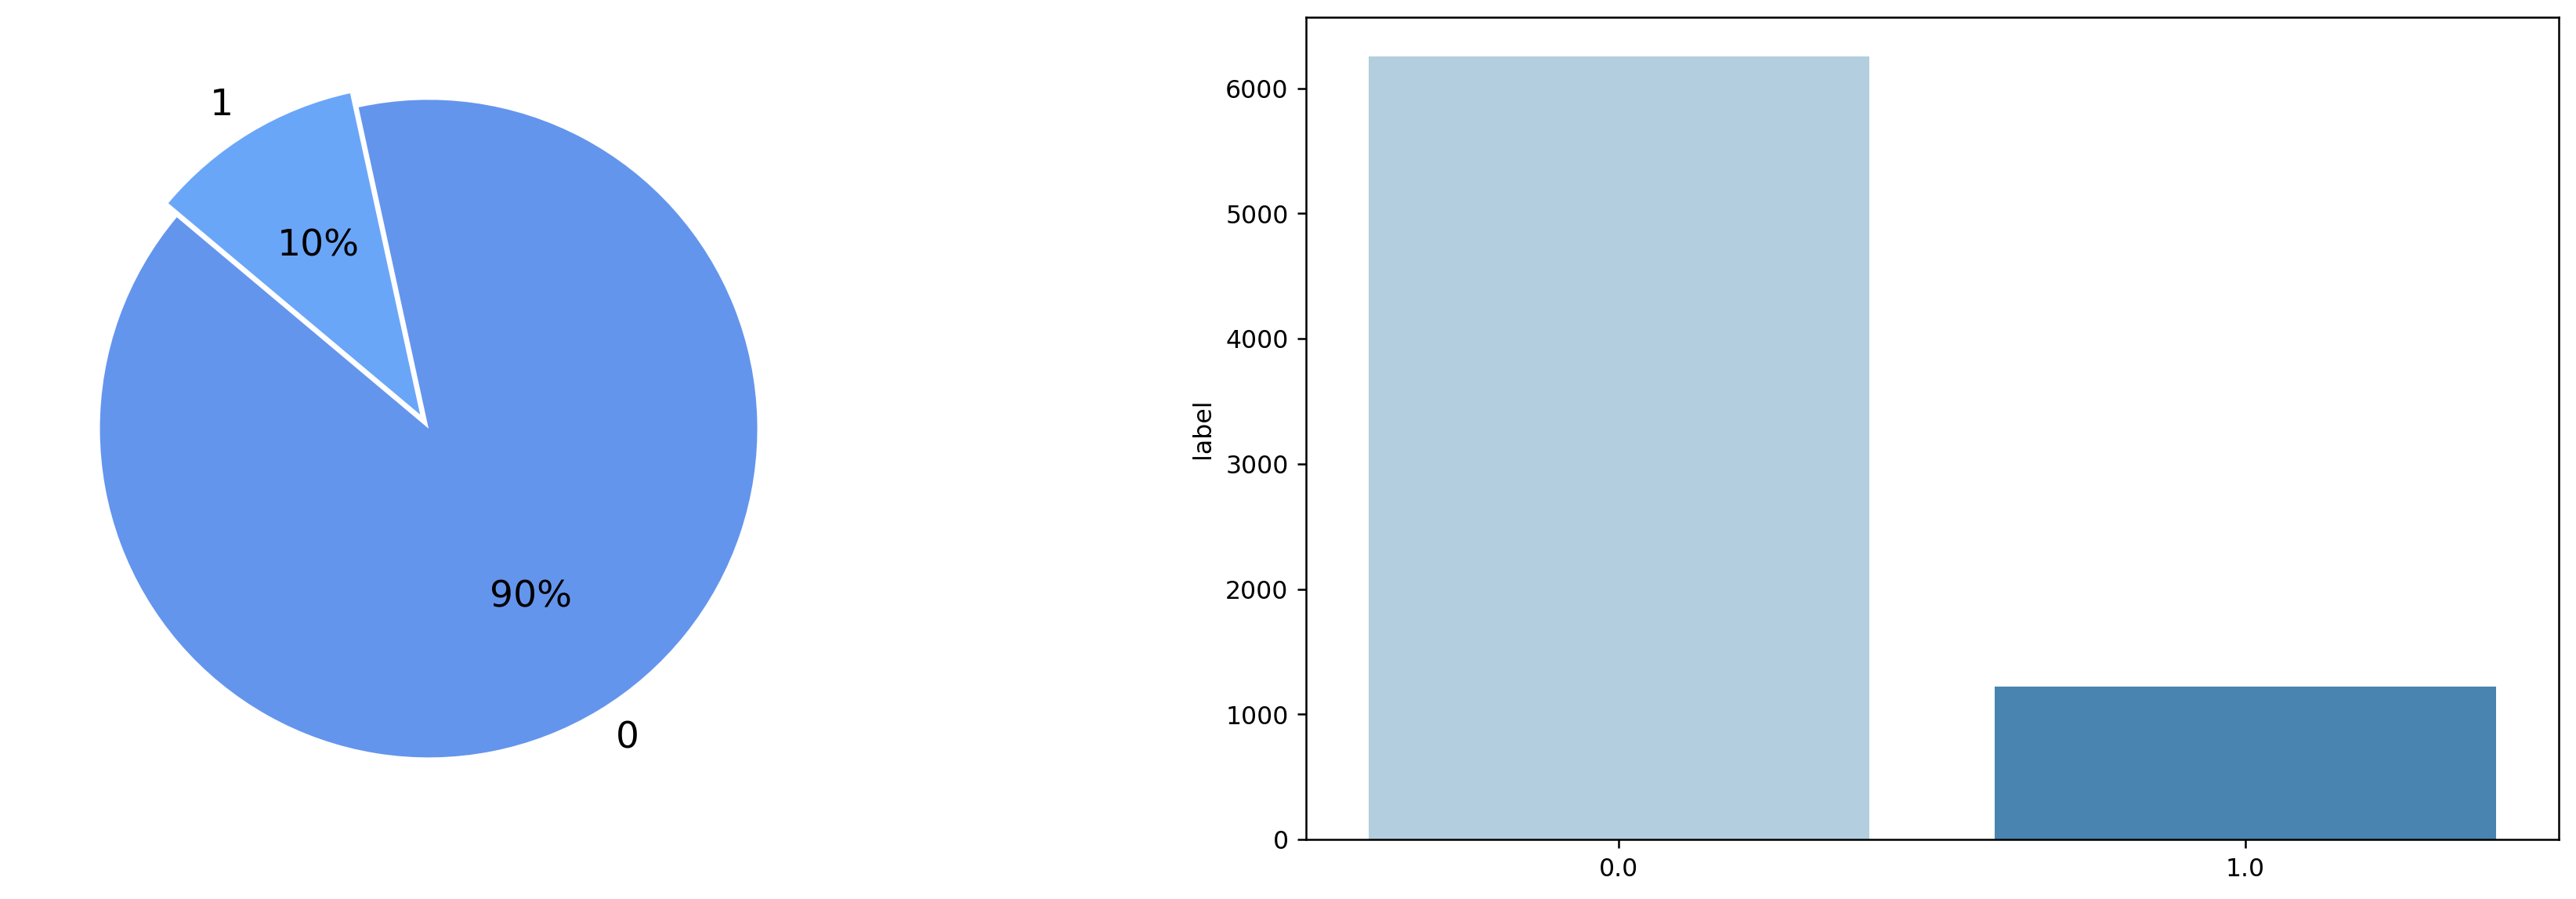

In [ ]:
labels = [0, 1]
sizes = [6240, 730]
custom_colours = ['#6495ED', '#6AA6F8']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette='Blues')

plt.show()


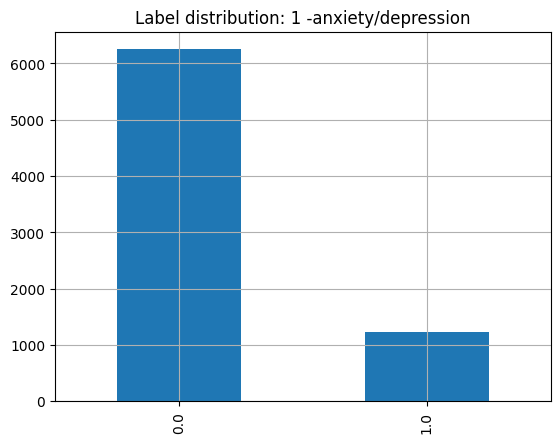

In [ ]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [ ]:
pip install spacy

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [ ]:
pip install beautifulsoup4

In [ ]:
print(df)

                                                   text  label   Age  Gender  \
2389                                 ya Allah get well.    0.0  17.0    Male   
43    There is a god who always accompanies our feet...    0.0  16.0    Male   
5812                            May the digital be good    0.0  14.0  Female   
1618                              can't sleep properly.    1.0  17.0    Male   
2689  What if the fee is 20% of the item you want to...    0.0  14.0    Male   
...                                                 ...    ...   ...     ...   
1235                                  Even that feeling    0.0  16.0    Male   
2454  [bb] If after waxing, what should I wear? or w...    0.0  14.0    Male   
6298  Just come, let's have sahur, melbu kerjo, take...    0.0  15.0  Female   
473                                   so proud of dream    0.0  16.0    Male   
5875  hi, from this random account.. the tweet accou...    0.0  14.0  Female   

     Age Category  
2389     Teen Age  

In [ ]:
df['cleaned'] = df["text"].apply(text_cleaner)

<ipython-input-35-fe15acf02d1a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [ ]:
pip install lxml


Glimpse of Student Text WordCloud :


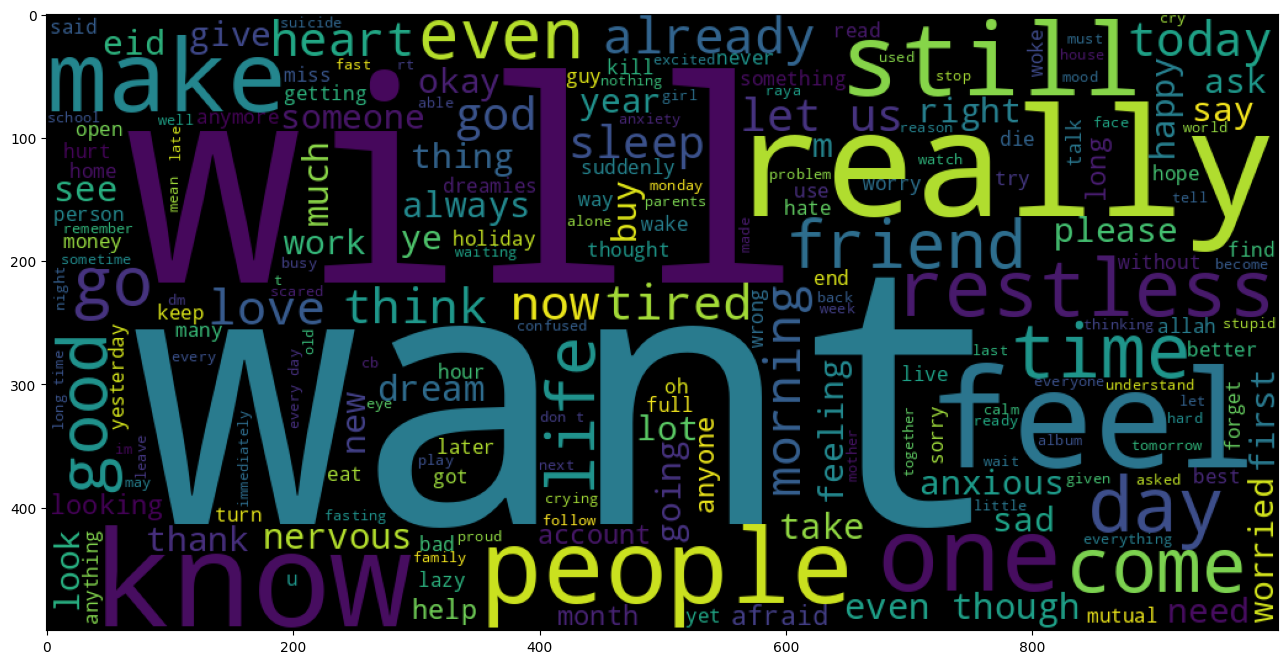

In [ ]:
print(f"\nGlimpse of Student Text WordCloud :")
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
pip install wordcloud

In [ ]:
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])


Glimpse of Normal Text WordCloud :


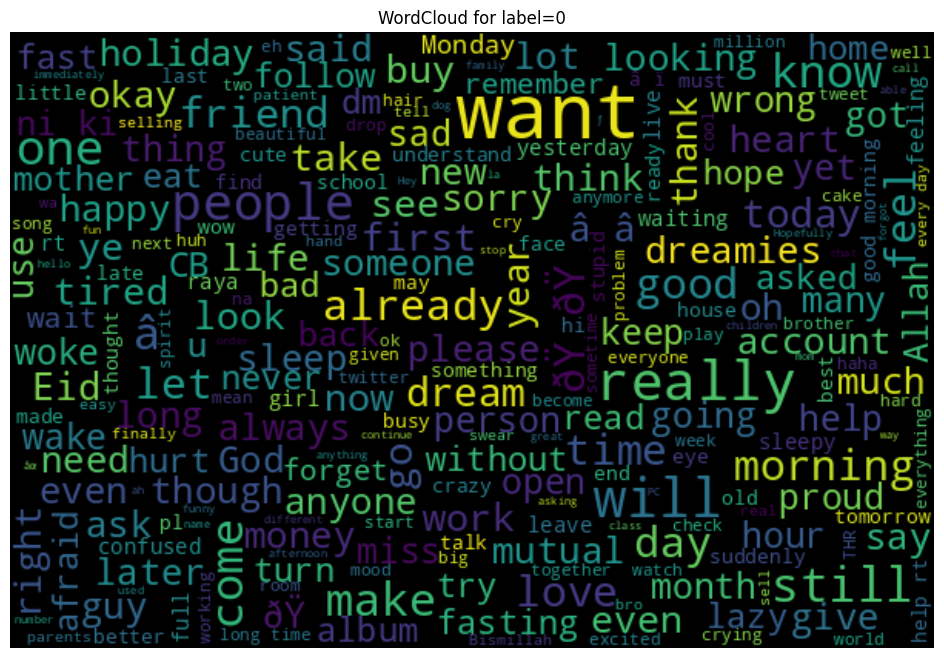

In [ ]:
print(f"\nGlimpse of Normal Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Glimpse of Depressed Text WordCloud :


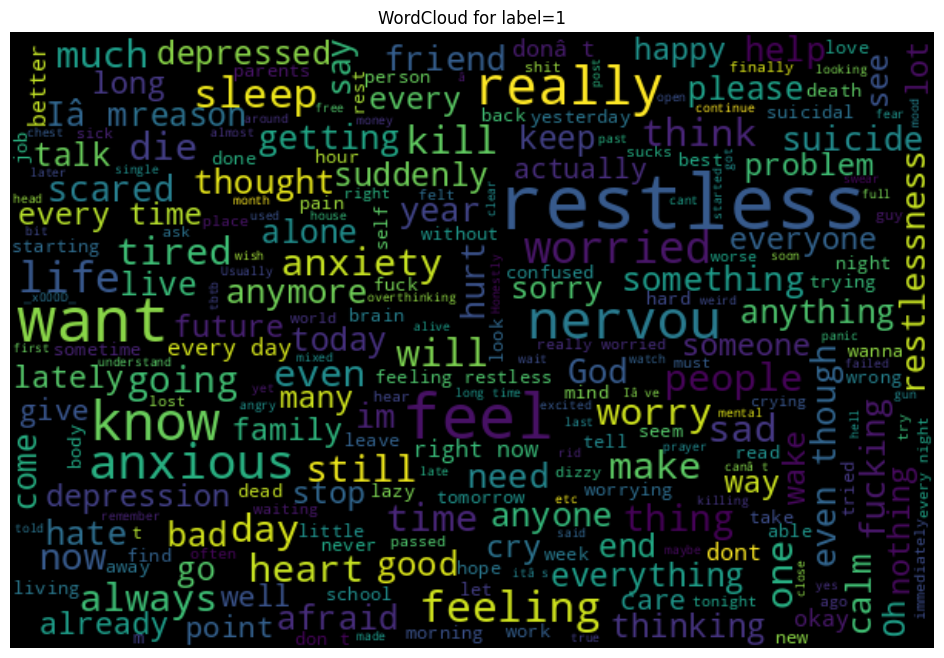

In [ ]:
print(f"\nGlimpse of Depressed Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-45-e0b952b5fda6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')


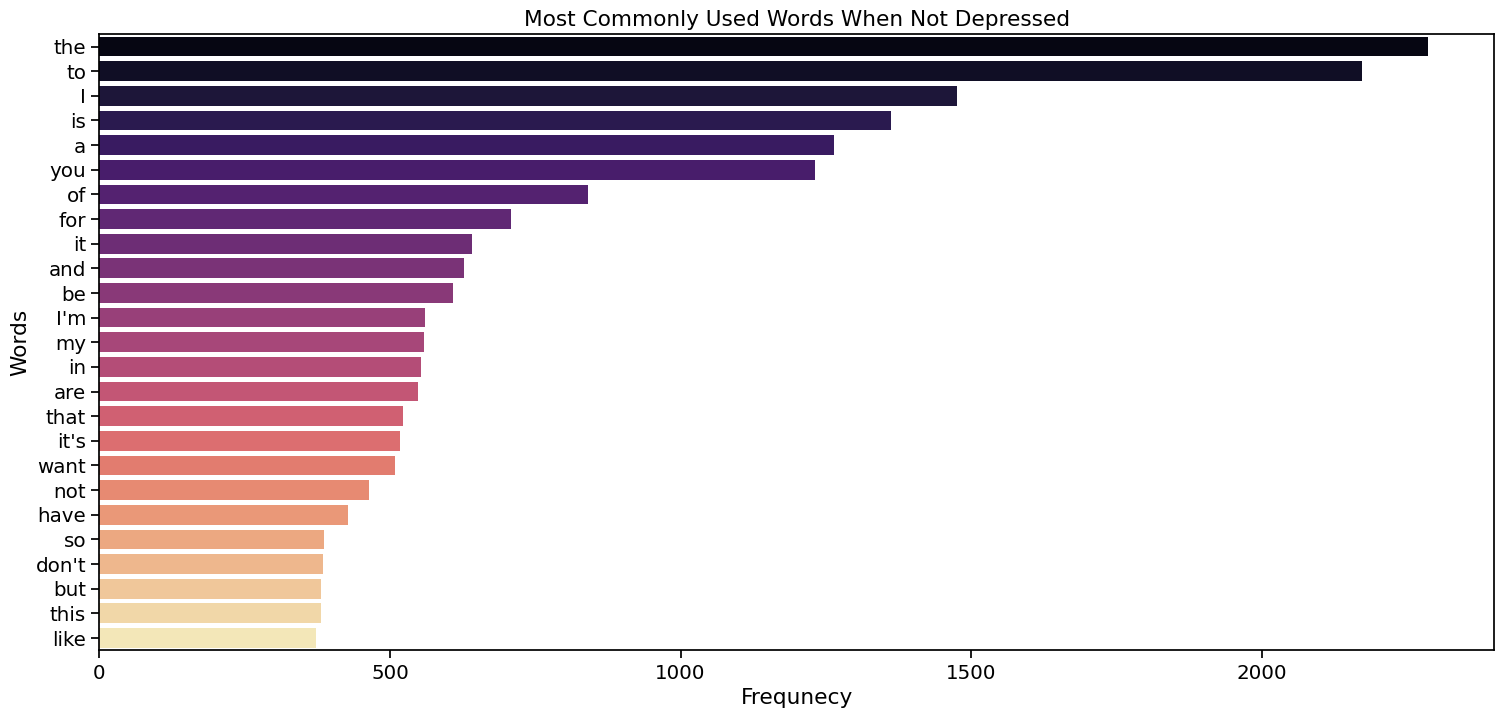

In [ ]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

<ipython-input-46-ae642b970c9f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')


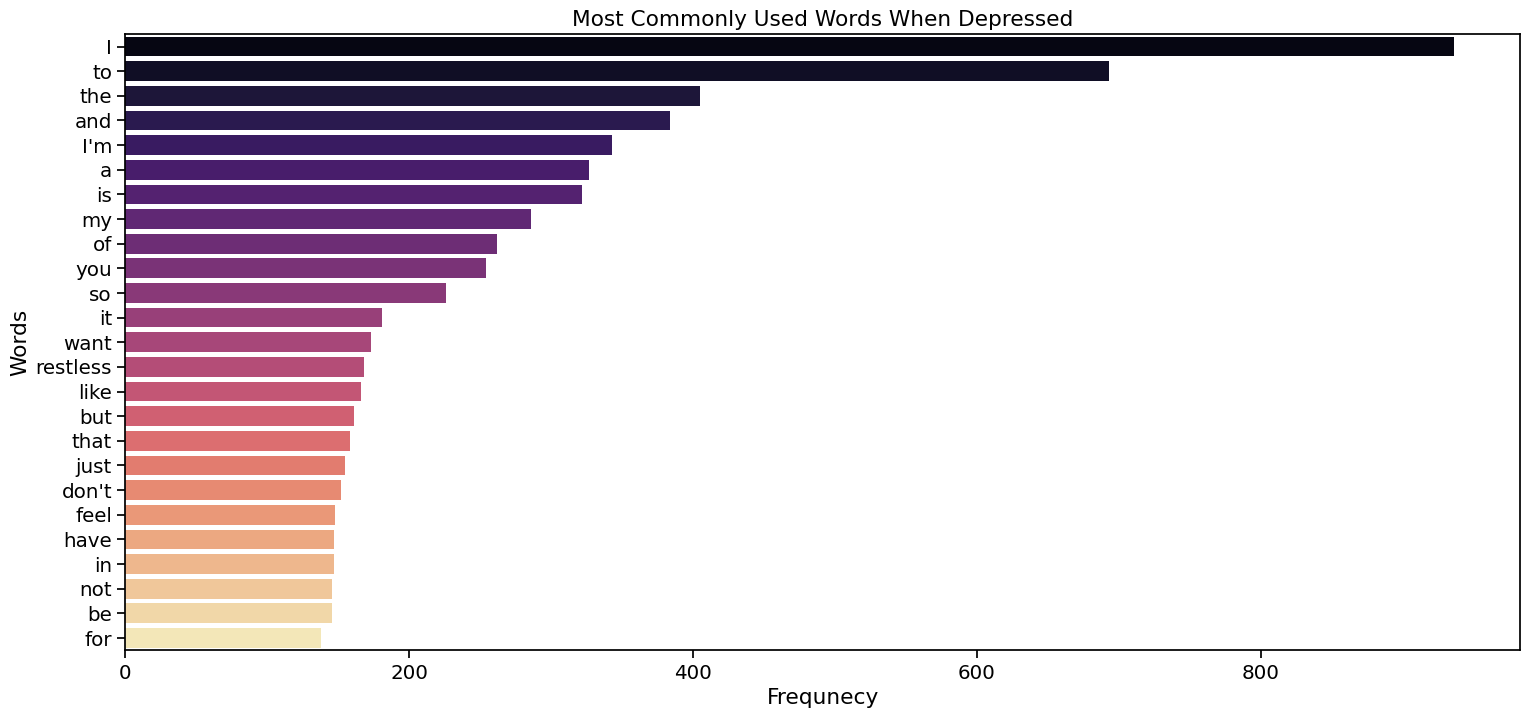

In [ ]:
all_dep_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

dl = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [ ]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Category,cleaned
1235,Even that feeling,0.000000,16.000000,Male,Teen Age,even that feeling
2454,"[bb] If after waxing, what should I wear? or what good?",0.000000,14.000000,Male,Young Age,bb if after waxing what should i wear or what good
6298,"Just come, let's have sahur, melbu kerjo, take my motorbike, let's take a pill",0.000000,15.000000,Female,Young Age,just come let us have sahur melbu kerjo take my motorbike let us take a pill
473,so proud of dream,0.000000,16.000000,Male,Teen Age,so proud of dream
5875,"hi, from this random account.. the tweet account is really made as a backup for reading/backup/reviews of what i watch or read or whatever. if you're uncomfortable, just block and unblock it. ..let's be as comfortable as possible on social media, enjoy! &thxu, wupðŸ¤—âœ¨",0.000000,14.000000,Female,Young Age,hi from this random account the tweet account is really made as a backup for reading backup reviews of what i watch or read or whatever if you are uncomfortable just block and unblock it let be as comfortable as possible on social media enjoy thxu wup


In [ ]:
X = df.cleaned
y = df.label

In [ ]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [ ]:
X_cv =vect.fit_transform(X).toarray()

In [ ]:
X_cv.shape

(7476, 20000)

In [ ]:
df.cleaned

2389                                   ya allah get well 
43      there is a god who always accompanies our feet...
5812                              may the digital be good
1618                               cannot sleep properly 
2689    what if the fee is     of the item you want to...
                              ...                        
1235                                    even that feeling
2454     bb  if after waxing  what should i wear  or w...
6298    just come  let us have sahur  melbu kerjo  tak...
473                                     so proud of dream
5875    hi  from this random account   the tweet accou...
Name: cleaned, Length: 7476, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

Accuracy : 0.9471925133689839

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1251
         1.0       0.93      0.73      0.82       245

    accuracy                           0.95      1496
   macro avg       0.94      0.86      0.89      1496
weighted avg       0.95      0.95      0.94      1496

   ------------ Confusion Matrix -------------- 


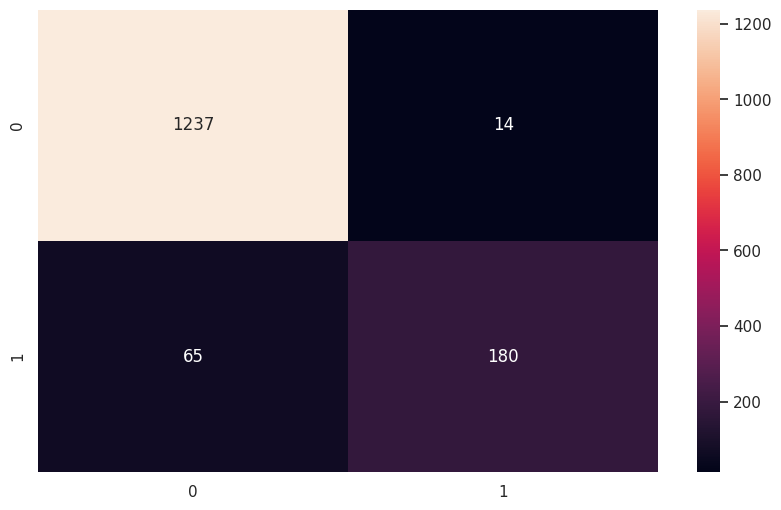

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Accuracy : 0.929144385026738

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      1251
         1.0       0.75      0.86      0.80       245

    accuracy                           0.93      1496
   macro avg       0.86      0.90      0.88      1496
weighted avg       0.93      0.93      0.93      1496

   ------------ Confusion Matrix -------------- 


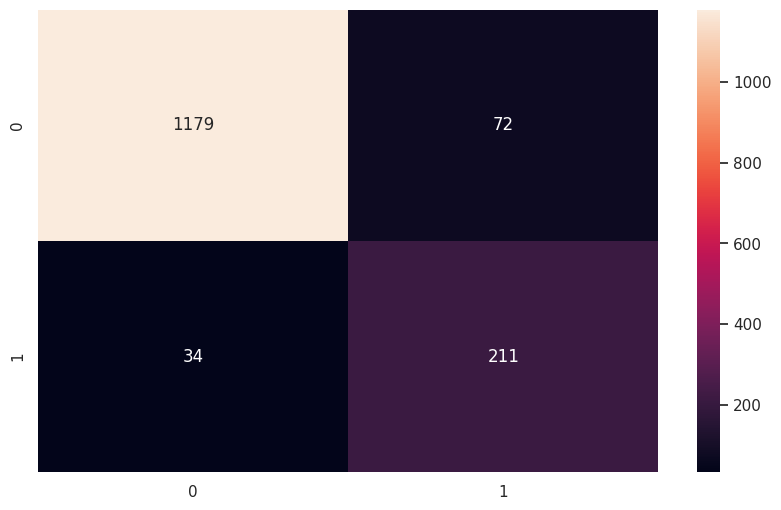

In [ ]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Accuracy : 0.9324866310160428

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1251
         1.0       0.81      0.77      0.79       245

    accuracy                           0.93      1496
   macro avg       0.88      0.87      0.87      1496
weighted avg       0.93      0.93      0.93      1496

   ------------ Confusion Matrix -------------- 


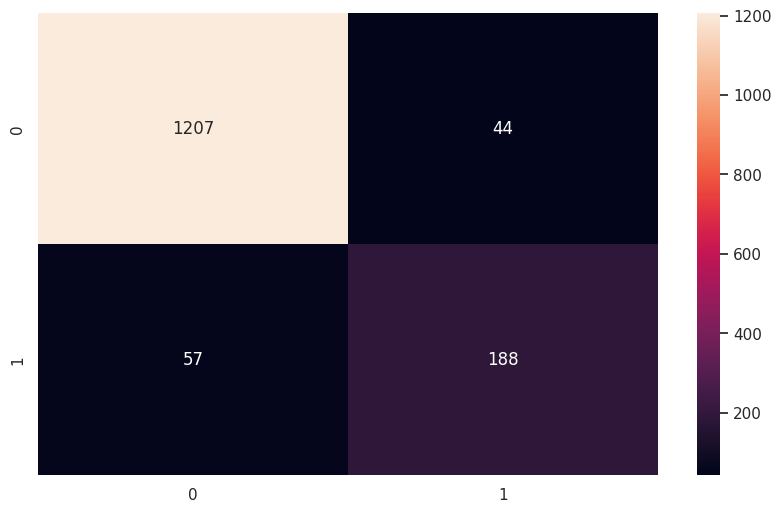

In [ ]:

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

Accuracy : 0.9030748663101604

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1251
         1.0       0.97      0.42      0.59       245

    accuracy                           0.90      1496
   macro avg       0.93      0.71      0.77      1496
weighted avg       0.91      0.90      0.89      1496

   ------------ Confusion Matrix -------------- 


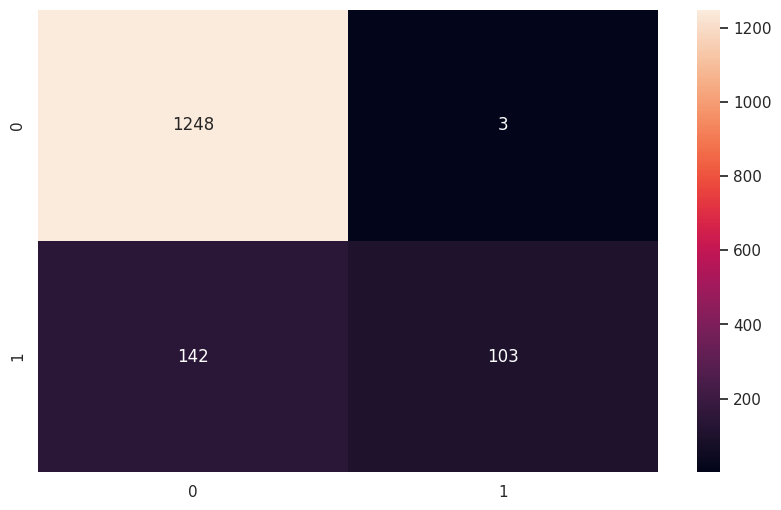

In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

Accuracy : 0.9498663101604278

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1251
         1.0       0.92      0.76      0.83       245

    accuracy                           0.95      1496
   macro avg       0.94      0.87      0.90      1496
weighted avg       0.95      0.95      0.95      1496

   ------------ Confusion Matrix -------------- 


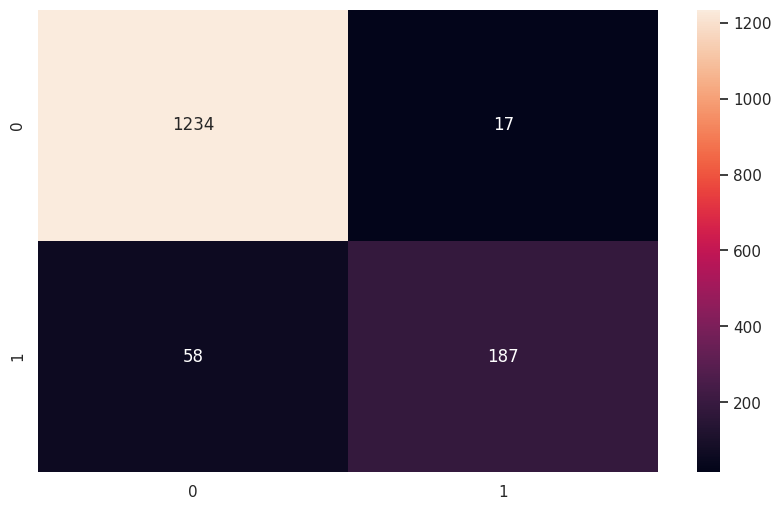

In [ ]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

Accuracy : 0.8562834224598931

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1251
         1.0       0.78      0.17      0.28       245

    accuracy                           0.86      1496
   macro avg       0.82      0.58      0.60      1496
weighted avg       0.85      0.86      0.82      1496

   ------------ Confusion Matrix -------------- 


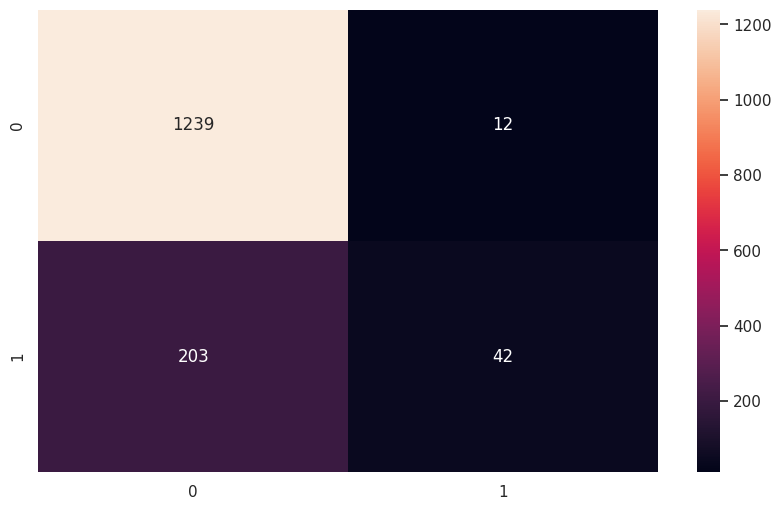

In [ ]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Accuracy : 0.9391711229946524

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1251
         1.0       0.93      0.68      0.78       245

    accuracy                           0.94      1496
   macro avg       0.94      0.83      0.87      1496
weighted avg       0.94      0.94      0.94      1496

   ------------ Confusion Matrix -------------- 


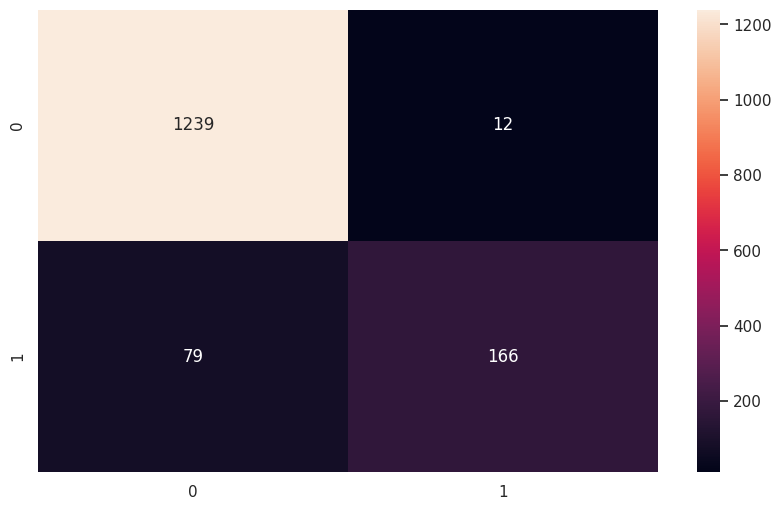

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Accuracy : 0.9425133689839572

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1251
         1.0       0.95      0.68      0.80       245

    accuracy                           0.94      1496
   macro avg       0.95      0.84      0.88      1496
weighted avg       0.94      0.94      0.94      1496

   ------------ Confusion Matrix -------------- 


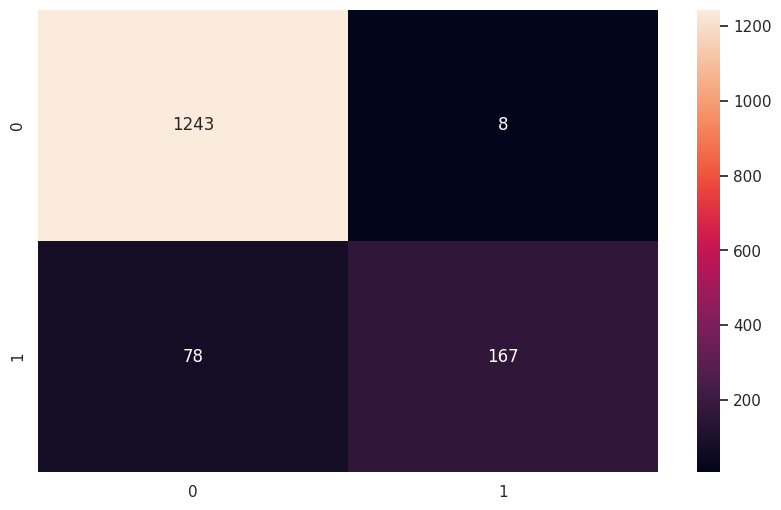

In [ ]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [ ]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

In [ ]:
text = "I am / exhauted :) and restless."

In [ ]:
clean_text = text_cleaner(text)

<ipython-input-35-fe15acf02d1a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [ ]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [ ]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

In [ ]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100))
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [ ]:
performance_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,Precision,Recall,F1 Score
Logistic Regression,95.270000,95.320000,95.290000
Decision Tree,92.370000,91.910000,92.090000
Random Forest,93.110000,92.980000,92.320000
Naive Bayes,93.490000,92.910000,93.110000
SVM,92.770000,92.710000,92.030000
KNN,84.590000,85.630000,81.550000
AdaBoost,94.880000,94.990000,94.800000


In [ ]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [ ]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

<ipython-input-76-808fa2dda5cd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(model_names, rotation=45);


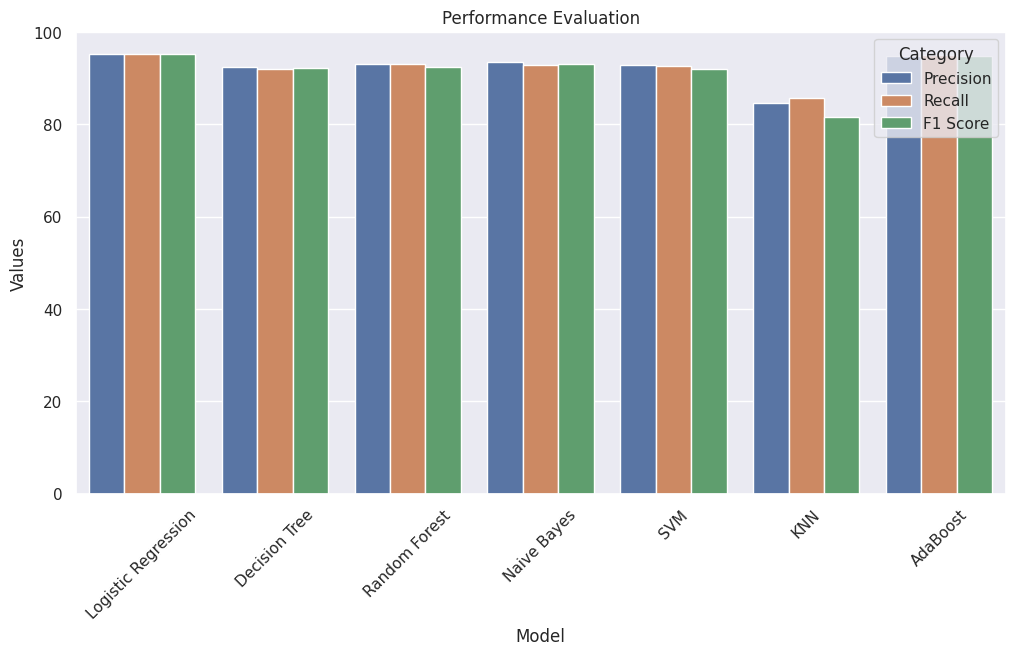

In [ ]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model')
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()

In [ ]:
# Load the previously saved model
filename = 'CV_BestModel.sav'
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
def predict_sentiment(text):
  """
  Preprocesses the text and predicts the sentiment ("depressed" or "not depressed").

  Args:
    text: The text to be analyzed.

  Returns:
    The predicted sentiment ("depressed" or "not depressed").
  """
  # Clean the text using the same cleaning function you used earlier
  clean_text = text_cleaner(text)

  # Transform the cleaned text into a feature vector using the same vectorizer
  text_features = vect.transform([clean_text]).toarray()

  # Make a prediction using the loaded model
  prediction = loaded_model.predict(text_features)[0]

  # Convert the numerical prediction to the corresponding sentiment label
  sentiment = {0: "Not Depressed", 1: "Depressed"}[prediction]

  return sentiment


In [ ]:
# Get text input from the user
new_text = input("Enter some text: ")

# Predict the sentiment
predicted_sentiment = predict_sentiment(new_text)

# Print the result
print(f"Prediction: {predicted_sentiment}")


Enter some text: I am happy 
Prediction: Not Depressed
Enter some text: I cannot do this anymore
Prediction: Not Depressed


In [1]:
# prompt: integrate google cloud vision

!pip install google-cloud-vision
from google.cloud import vision
import io

# Create a Vision client
client = vision.ImageAnnotatorClient()

# Load the image from the file
with io.open('image.jpg', 'rb') as image_file:
    content = image_file.read()

# Perform image detection on the image file
response = client.image_detection(image=content)

# Get the labels from the response
labels = response.label_annotations

# Print the labels
for label in labels:
    print(label.description)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.6/459.6 kB 3.5 MB/s eta 0:00:00


FileNotFoundError: [Errno 2] No such file or directory: 'image.jpg'